# Data Collection pt. 2

This notebook will expand on Data Collection pt.1, it will focus on importing NFL game data and schedules from 1970-2022 as well as exploring some basic modelling

Note: Once again many code blocks needed to be run individually in order to collect data using the Sportsipy API, but once finished they were converted to Raw NBConvert

In [1]:
#Import necessary libraries

from sportsipy.nfl.boxscore import Boxscores
from sportsipy.nfl.schedule import Schedule, Game
from sportsipy.nfl.teams import Teams, Team

import pandas as pd
import numpy as np


The following lines of code were run in order to extract the team abbreviations for all seasons in the NFL dating back to 1970. Every time there is a code block with a new date was when the amount of teams in the league was different.

The code below was used to collect the schedule from 1970-2022. Using the above team abbreviations for their corresponding years, each time the code was run, the year=___ was changed in order to collect the data for that year. Then each time there was an adjustment to be made in the team abbrs, a new code block was created for clarity. 

For example, from 2022 to 2002 the amount of teams in the league was the same so each time the block was run, the year just had to changed in "Schedule(i, year= ___ ) and at the end to save the csv under a new name. Then from 2001-1999 there was a different amount of teams in the league so the "for i in ___ " had to be changed to the new list of team abbreviations

The below code was used create a column in each individual schedule csv file for the year it represents. Then all of these files were merged into one master file with the schedule for every season.

In [2]:
#combined_schedule.to_csv('combined_schedule.csv', index=False)

combined_schedule = pd.read_csv('combined_schedule.csv')

In [3]:
combined_schedule.sample(20)

,boxscore_index,date,datetime,day,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,...,rush_yards_per_attempt,third_down_attempts,third_down_conversions,time_of_possession,times_sacked,type,week,yards_lost_from_sacks,team_abbr,year
21080,199612150det,December 15,1996-12-15,Sun,3,2,1,1,1.0,1.0,...,4.3,10.0,5.0,27:01,3,Reg,16,15,gnb,1996
5459,201010030gnb,October 3,2010-10-03,Sun,4,4,0,0,0.0,0.0,...,4.4,7.0,3.0,22:23,2,Reg,4,12,gnb,2010
17685,199012020chi,December 2,1990-12-02,Sun,2,2,2,1,NaN,NaN,...,4.8,NaN,NaN,38:33,2,Reg,13,11,chi,1990
2427,200010290tam,October 29,2000-10-29,Sun,5,5,2,2,1.0,0.0,...,6.1,6.0,3.0,27:47,1,Reg,9,6,tam,2000
6100,200411280atl,November 28,2004-11-28,Sun,1,1,3,2,2.0,1.0,...,5.0,16.0,6.0,32:00,4,Reg,12,24,nor,2004
23827,202010180phi,October 18,2020-10-18,Sun,0,0,1,0,3.0,1.0,...,10.8,12.0,3.0,23:30,6,Reg,6,43,phi,2020
1681,201612110cle,December 11,2016-12-11,Sun,3,2,2,1,0.0,0.0,...,5.6,15.0,8.0,34:53,4,Reg,14,33,cin,2016
23765,202012130phi,December 13,2020-12-13,Sun,3,3,2,0,1.0,0.0,...,4.8,12.0,5.0,29:44,5,Reg,14,29,nor,2020
16780,198509290nyj,September 29,1985-09-29,Sun,2,2,2,2,NaN,NaN,...,3.6,NaN,NaN,29:30,0,Reg,4,0,clt,1985
4914,201111130chi,November 13,2011-11-13,Sun,1,1,2,2,2.0,1.0,...,4.2,17.0,4.0,30:54,2,Reg,10,16,det,2011


In [4]:
combined_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25612 entries, 0 to 25611
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   boxscore_index           25612 non-null  object 
 1   date                     25612 non-null  object 
 2   datetime                 25612 non-null  object 
 3   day                      25612 non-null  object 
 4   extra_points_attempted   25612 non-null  int64  
 5   extra_points_made        25612 non-null  int64  
 6   field_goals_attempted    25612 non-null  int64  
 7   field_goals_made         25612 non-null  int64  
 8   fourth_down_attempts     16573 non-null  float64
 9   fourth_down_conversions  16573 non-null  float64
 10  interceptions            25612 non-null  int64  
 11  location                 25612 non-null  object 
 12  opponent_abbr            25612 non-null  object 
 13  opponent_name            25612 non-null  object 
 14  overtime              

In [5]:
#Dropping irrelevant columns

combined_schedule = combined_schedule.drop(['date','overtime','type','day','opponent_name','boxscore_index', 'location', 'opponent_abbr', 'datetime'], axis =1)

In [6]:
combined_schedule['time_of_possession']

0        34:25
1        23:41
2        29:43
3        30:32
4        28:44
         ...  
25607    27:51
25608    31:25
25609    26:27
25610    36:08
25611    27:00
Name: time_of_possession, Length: 25612, dtype: object

In [7]:
#Converting time_of_possession to an integer (seconds) 


from datetime import datetime
import numpy as np

def convert_to_seconds(time_str):
    if isinstance(time_str, str):
        time_obj = datetime.strptime(time_str, '%M:%S')
        total_seconds = time_obj.minute * 60 + time_obj.second
        return total_seconds
    else:
        return 0

combined_schedule['time_of_possession'] = combined_schedule['time_of_possession'].apply(convert_to_seconds)

print(combined_schedule['time_of_possession'])


0        2065
1        1421
2        1783
3        1832
4        1724
         ... 
25607    1671
25608    1885
25609    1587
25610    2168
25611    1620
Name: time_of_possession, Length: 25612, dtype: int64


In [8]:
combined_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25612 entries, 0 to 25611
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   extra_points_attempted   25612 non-null  int64  
 1   extra_points_made        25612 non-null  int64  
 2   field_goals_attempted    25612 non-null  int64  
 3   field_goals_made         25612 non-null  int64  
 4   fourth_down_attempts     16573 non-null  float64
 5   fourth_down_conversions  16573 non-null  float64
 6   interceptions            25612 non-null  int64  
 7   pass_attempts            25612 non-null  int64  
 8   pass_completion_rate     25612 non-null  float64
 9   pass_completions         25612 non-null  int64  
 10  pass_touchdowns          25612 non-null  int64  
 11  pass_yards               25612 non-null  int64  
 12  pass_yards_per_attempt   25612 non-null  float64
 13  points_allowed           25612 non-null  int64  
 14  points_scored         

In [9]:
# Feature reduction by combining features into ratios
# Implementing try - except to replace any null values with 0's
try:
    combined_schedule['extra_points_ratio'] = combined_schedule['extra_points_made'] / combined_schedule['extra_points_attempted']
except ZeroDivisionError:
    combined_schedule['extra_points_ratio'] = 0
combined_schedule['extra_points_ratio'] = combined_schedule['extra_points_ratio'].fillna(0)

try:
    combined_schedule['field_goal_ratio'] = combined_schedule['field_goals_made'] / combined_schedule['field_goals_attempted']
except ZeroDivisionError:
    combined_schedule['field_goal_ratio'] = 0
combined_schedule['field_goal_ratio'] = combined_schedule['field_goal_ratio'].fillna(0)
    
try:    
    combined_schedule['fourth_down_ratio'] = combined_schedule['fourth_down_conversions'] / combined_schedule['fourth_down_attempts']
except ZeroDivisionError:
    combined_schedule['fourth_down_ratio'] = 0
combined_schedule['fourth_down_ratio'] = combined_schedule['fourth_down_ratio'].fillna(0)

combined_schedule = combined_schedule.drop(['extra_points_attempted', 'extra_points_made','field_goals_made', 'field_goals_attempted', 'fourth_down_conversions', 'fourth_down_attempts'], axis=1)

combined_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25612 entries, 0 to 25611
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   interceptions           25612 non-null  int64  
 1   pass_attempts           25612 non-null  int64  
 2   pass_completion_rate    25612 non-null  float64
 3   pass_completions        25612 non-null  int64  
 4   pass_touchdowns         25612 non-null  int64  
 5   pass_yards              25612 non-null  int64  
 6   pass_yards_per_attempt  25612 non-null  float64
 7   points_allowed          25612 non-null  int64  
 8   points_scored           25612 non-null  int64  
 9   punt_yards              25612 non-null  int64  
 10  punts                   25612 non-null  int64  
 11  quarterback_rating      25612 non-null  float64
 12  result                  25612 non-null  object 
 13  rush_attempts           25612 non-null  int64  
 14  rush_touchdowns         25612 non-null

In [10]:
#Dropping more columns that are summarized by others

combined_schedule = combined_schedule.drop(['pass_attempts','pass_completions','pass_yards','rush_attempts', 'rush_yards'], axis=1)
combined_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25612 entries, 0 to 25611
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   interceptions           25612 non-null  int64  
 1   pass_completion_rate    25612 non-null  float64
 2   pass_touchdowns         25612 non-null  int64  
 3   pass_yards_per_attempt  25612 non-null  float64
 4   points_allowed          25612 non-null  int64  
 5   points_scored           25612 non-null  int64  
 6   punt_yards              25612 non-null  int64  
 7   punts                   25612 non-null  int64  
 8   quarterback_rating      25612 non-null  float64
 9   result                  25612 non-null  object 
 10  rush_touchdowns         25612 non-null  int64  
 11  rush_yards_per_attempt  25612 non-null  float64
 12  third_down_attempts     16573 non-null  float64
 13  third_down_conversions  16573 non-null  float64
 14  time_of_possession      25612 non-null

It seems like third down ratio and conversions were not tracked metrics in the first several years of the dataset. We will solve this issue by replacing these missing values with zeroes. Since these missing values are all from the same sets of games, when creating the final dataframe, substracting the home from the away will just yield a zero, not influencing which team is predicted to win.

In [12]:
#Creating a third down ratio feature

try:
    combined_schedule['third_down_ratio'] = combined_schedule['third_down_conversions'] / combined_schedule['third_down_attempts']
except ZeroDivisionError:
    combined_schedule['third_down_ratio'] = 0
combined_schedule['third_down_ratio'] = combined_schedule['third_down_ratio'].fillna(0)
    
    
combined_schedule = combined_schedule.drop(['third_down_conversions', 'third_down_attempts'], axis=1)

combined_schedule.info()

KeyError: 'third_down_conversions'

In [13]:
combined_schedule[['punts','punt_yards']]
combined_schedule = combined_schedule.drop(['punt_yards'], axis=1)


Once again, these two features are highly correlated. I decided to drop punt yards because it is less representative of a team's success. Punts alone is much more powerful of a variable in terms of impact on a game


In [14]:
#Mapping wins to 1 and losses to 0

combined_schedule['result'] = combined_schedule['result'].map({'Loss':0,'Win':1})
print(combined_schedule['result'])

0        1.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
25607    1.0
25608    1.0
25609    0.0
25610    1.0
25611    1.0
Name: result, Length: 25612, dtype: float64


In [15]:
combined_schedule.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25612 entries, 0 to 25611
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   interceptions           25612 non-null  int64  
 1   pass_completion_rate    25612 non-null  float64
 2   pass_touchdowns         25612 non-null  int64  
 3   pass_yards_per_attempt  25612 non-null  float64
 4   points_allowed          25612 non-null  int64  
 5   points_scored           25612 non-null  int64  
 6   punts                   25612 non-null  int64  
 7   quarterback_rating      25612 non-null  float64
 8   result                  25496 non-null  float64
 9   rush_touchdowns         25612 non-null  int64  
 10  rush_yards_per_attempt  25612 non-null  float64
 11  time_of_possession      25612 non-null  int64  
 12  times_sacked            25612 non-null  int64  
 13  week                    25612 non-null  int64  
 14  yards_lost_from_sacks   25612 non-null

In [16]:
# Attributing 0.5 to games that ended in a tie

combined_schedule['result'].fillna(0.5, inplace=True)
combined_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25612 entries, 0 to 25611
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   interceptions           25612 non-null  int64  
 1   pass_completion_rate    25612 non-null  float64
 2   pass_touchdowns         25612 non-null  int64  
 3   pass_yards_per_attempt  25612 non-null  float64
 4   points_allowed          25612 non-null  int64  
 5   points_scored           25612 non-null  int64  
 6   punts                   25612 non-null  int64  
 7   quarterback_rating      25612 non-null  float64
 8   result                  25612 non-null  float64
 9   rush_touchdowns         25612 non-null  int64  
 10  rush_yards_per_attempt  25612 non-null  float64
 11  time_of_possession      25612 non-null  int64  
 12  times_sacked            25612 non-null  int64  
 13  week                    25612 non-null  int64  
 14  yards_lost_from_sacks   25612 non-null

In [17]:
#Creating a function that will aggregate team data up to any given week of the season


def agg_weekly_data(df, week, year):
    
    filtered_df = df[(df['week'] < week) & (df['year'] == year)]
    agg_df = filtered_df.groupby('team_abbr').agg({
        'interceptions': 'mean',
        'pass_completion_rate': 'mean',
        'pass_touchdowns': 'mean',
        'pass_yards_per_attempt': 'mean',
        'points_allowed': 'mean',
        'points_scored': 'mean',
        'punts': 'mean',
        'quarterback_rating': 'mean',
        'result': 'mean', #essentially creating a win ratio
        'rush_touchdowns': 'mean',
        'rush_yards_per_attempt': 'mean',
        'time_of_possession': 'mean',
        'times_sacked': 'mean',
        'yards_lost_from_sacks': 'mean',
        'extra_points_ratio': 'mean', #pandas will automatically exclude nullvalues from the agg
        'field_goal_ratio': 'mean',
        'fourth_down_ratio': 'mean',
        'third_down_ratio': 'mean'
    }).reset_index()
    
    agg_df = agg_df.rename(columns={
        'interceptions': 'avg_interceptions_thrown',
        'pass_completion_rate':'avg_pass_completion_rate',
        'pass_touchdowns': 'avg_pass_touchdowns',
        'pass_yards_per_attempt': 'avg_pass_yards_per_attempt',
        'points_allowed': 'avg_points_allowed',
        'points_scored': 'avg_points_scored',
        'punts': 'avg_punts',
        'quarterback_rating': 'avg_quarterback_rating',
        'result': 'win_ratio', 
        'rush_touchdowns': 'avg_rush_touchdowns',
        'rush_yards_per_attempt': 'avg_rush_yards_per_attempt',
        'time_of_possession': 'avg_time_of_possession',
        'times_sacked': 'avg_times_sacked',
        'yards_lost_from_sacks': 'avg_yards_lost_from_sacks',
        'extra_points_ratio': 'avg_extra_points_ratio', 
        'field_goal_ratio': 'avg_field_goal_ratio',
        'fourth_down_ratio': 'avg_fourth_down_ratio',
        'third_down_ratio': 'avg_third_down_ratio'
     })
    #Return the week and year that is currently being aggregated to
    agg_df['week'] = week
    agg_df['year'] = year
    
    return agg_df

In [18]:
agg_weekly_data(combined_schedule,2,2022)

,team_abbr,avg_interceptions_thrown,avg_pass_completion_rate,avg_pass_touchdowns,avg_pass_yards_per_attempt,avg_points_allowed,avg_points_scored,avg_punts,avg_quarterback_rating,win_ratio,...,avg_rush_yards_per_attempt,avg_time_of_possession,avg_times_sacked,avg_yards_lost_from_sacks,avg_extra_points_ratio,avg_field_goal_ratio,avg_fourth_down_ratio,avg_third_down_ratio,week,year
0,atl,0,60.6,0,6.5,27,26,4,79.7,0.0,...,5.3,2024,0,0,1.000000,0.800000,0.000000,0.384615,2,2022
1,buf,2,83.9,3,9.6,10,31,0,111.3,1.0,...,4.8,1874,2,5,1.000000,1.000000,0.000000,0.900000,2,2022
2,car,1,59.3,1,8.7,26,24,5,80.3,0.0,...,2.8,1294,4,28,1.000000,1.000000,0.000000,0.363636,2,2022
3,chi,1,47.1,2,7.1,10,19,6,81.7,1.0,...,2.7,1592,2,16,0.333333,0.000000,0.000000,0.357143,2,2022
4,cin,4,62.3,2,6.4,23,20,3,58.6,0.0,...,3.9,2622,7,39,0.000000,0.666667,0.333333,0.500000,2,2022
5,cle,0,52.9,1,4.3,24,26,4,72.9,1.0,...,5.6,2306,1,9,1.000000,1.000000,0.500000,0.444444,2,2022
6,clt,1,64.0,1,7.0,20,20,4,82.1,0.5,...,4.7,2377,2,12,1.000000,0.666667,0.000000,0.400000,2,2022
7,crd,0,63.2,2,5.4,44,21,5,91.9,0.0,...,4.7,1518,3,26,1.000000,0.000000,0.750000,0.250000,2,2022
8,dal,1,50.0,0,4.7,19,3,5,51.0,0.0,...,3.9,1638,4,25,0.000000,1.000000,0.400000,0.200000,2,2022
9,den,0,69.0,1,8.1,17,16,1,100.3,0.0,...,5.2,2019,2,10,1.000000,0.750000,0.000000,0.533333,2,2022


In [19]:
complete_agg_weekly_data = pd.DataFrame()
years = range(1970, 2023)  

#Nested for statements to combine the agg_weekly_data function for each week of each season
for year in years:
    for week in range(2, 24):
        agg_data = agg_weekly_data(combined_schedule, week, year)
        complete_agg_weekly_data = complete_agg_weekly_data.append(agg_data, ignore_index=True)


In [20]:
complete_agg_weekly_data

,team_abbr,avg_interceptions_thrown,avg_pass_completion_rate,avg_pass_touchdowns,avg_pass_yards_per_attempt,avg_points_allowed,avg_points_scored,avg_punts,avg_quarterback_rating,win_ratio,...,avg_rush_yards_per_attempt,avg_time_of_possession,avg_times_sacked,avg_yards_lost_from_sacks,avg_extra_points_ratio,avg_field_goal_ratio,avg_fourth_down_ratio,avg_third_down_ratio,week,year
0,atl,1.000000,55.000000,1.000000,6.700000,3.000000,14.000000,7.000000,67.900000,1.000000,...,4.500000,0.000000,3.000000,17.000000,1.000000,0.000000,0.000000,0.000000,2,1970
1,buf,1.000000,43.500000,0.000000,4.000000,25.000000,10.000000,10.000000,32.700000,0.000000,...,3.100000,0.000000,5.000000,36.000000,1.000000,1.000000,0.000000,0.000000,2,1970
2,chi,1.000000,53.300000,1.000000,6.100000,16.000000,24.000000,5.000000,65.700000,1.000000,...,2.600000,0.000000,2.000000,24.000000,1.000000,0.500000,0.000000,0.000000,2,1970
3,cin,0.000000,44.400000,1.000000,8.200000,21.000000,31.000000,7.000000,84.700000,1.000000,...,6.200000,0.000000,5.000000,30.000000,1.000000,0.333333,0.000000,0.000000,2,1970
4,cle,0.000000,44.400000,1.000000,5.400000,21.000000,31.000000,5.000000,73.800000,1.000000,...,2.500000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,2,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34529,sdg,0.555556,68.116667,1.500000,6.855556,23.055556,23.388889,4.333333,92.911111,0.555556,...,3.616667,1848.833333,2.333333,12.611111,1.000000,0.884259,0.348148,0.434311,23,2022
34530,sea,0.722222,69.788889,1.777778,7.544444,24.555556,23.888889,3.888889,98.072222,0.500000,...,4.550000,1735.500000,2.722222,20.722222,0.981481,0.900926,0.370370,0.372373,23,2022
34531,sfo,0.450000,65.685000,1.650000,8.050000,17.150000,25.850000,3.500000,101.415000,0.750000,...,4.600000,1891.550000,1.850000,11.500000,0.965000,0.720833,0.183333,0.443986,23,2022
34532,tam,0.611111,65.672222,1.555556,6.355556,21.611111,18.166667,4.666667,88.227778,0.444444,...,3.272222,1765.166667,1.333333,9.833333,0.750000,0.743519,0.411376,0.381718,23,2022


In [21]:
# Converting week and year to strings to facilitate merging

complete_agg_weekly_data['week'] =complete_agg_weekly_data['week'].astype(str)
complete_agg_weekly_data['year'] =complete_agg_weekly_data['year'].astype(str)

In [22]:
complete_agg_weekly_data[complete_agg_weekly_data['week'] == '7']

,team_abbr,avg_interceptions_thrown,avg_pass_completion_rate,avg_pass_touchdowns,avg_pass_yards_per_attempt,avg_points_allowed,avg_points_scored,avg_punts,avg_quarterback_rating,win_ratio,...,avg_rush_yards_per_attempt,avg_time_of_possession,avg_times_sacked,avg_yards_lost_from_sacks,avg_extra_points_ratio,avg_field_goal_ratio,avg_fourth_down_ratio,avg_third_down_ratio,week,year
130,atl,1.500000,58.333333,1.333333,6.150000,16.833333,16.833333,5.166667,70.016667,0.500000,...,3.916667,0.000000,2.833333,23.833333,0.750000,0.375000,0.000000,0.000000,7,1970
131,buf,2.166667,53.000000,0.666667,8.200000,22.833333,13.000000,6.000000,50.350000,0.333333,...,3.233333,0.000000,4.500000,45.833333,0.833333,0.472222,0.000000,0.000000,7,1970
132,chi,1.666667,53.750000,1.000000,5.600000,20.000000,12.500000,5.833333,58.800000,0.333333,...,2.700000,0.000000,1.833333,14.666667,0.833333,0.277778,0.000000,0.000000,7,1970
133,cin,1.166667,50.266667,0.666667,6.150000,26.000000,15.500000,6.000000,55.966667,0.166667,...,3.866667,0.000000,3.166667,23.000000,0.666667,0.511111,0.000000,0.000000,7,1970
134,cle,1.833333,49.383333,1.500000,7.833333,21.666667,26.500000,5.000000,71.166667,0.666667,...,3.116667,0.000000,0.833333,8.333333,0.916667,0.416667,0.000000,0.000000,7,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34017,sdg,0.500000,66.616667,1.666667,6.900000,25.333333,23.500000,3.833333,95.666667,0.666667,...,3.466667,1881.333333,1.166667,6.000000,1.000000,0.916667,0.305556,0.404281,7,2022
34018,sea,0.500000,72.900000,1.500000,8.100000,27.166667,24.333333,3.333333,104.000000,0.500000,...,5.050000,1645.666667,2.333333,18.666667,0.944444,0.777778,0.111111,0.417901,7,2022
34019,sfo,0.666667,60.166667,1.166667,7.566667,14.833333,20.333333,3.833333,86.933333,0.500000,...,4.333333,1796.333333,1.500000,8.333333,0.966667,0.611111,0.111111,0.390931,7,2022
34020,tam,0.166667,66.366667,1.333333,6.716667,17.166667,20.166667,4.500000,92.133333,0.500000,...,2.633333,1698.000000,1.500000,10.833333,0.666667,0.966667,0.333333,0.380215,7,2022


- I ran the above code individual times changing the dates from 1970-2023, and altering the number of weeks accordingly (season week lengths vary from 17 to 22 depending on the year. Manually importing each season ensured maximizing data collection and avoiding runtime errors)
- Superbowl games were not included as there is no true home or away team in these cases
- Game data from 1982 and 1987 were not obtained due to an error with the api

In [23]:
#schedule_df.to_csv('combined_games.csv', index=False)
schedule_df = pd.read_csv('combined_games.csv')

In [24]:
schedule_df

,week,away_abbr,home_abbr,winning_abbr
0,1-2011,nor,gnb,gnb
1,1-2011,phi,ram,phi
2,1-2011,clt,htx,htx
3,1-2011,oti,jax,jax
4,1-2011,pit,rav,rav
...,...,...,...,...
12430,19-2020,rav,buf,buf
12431,19-2020,cle,kan,kan
12432,19-2020,tam,nor,tam
12433,20-2020,tam,gnb,tam


In [25]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12435 entries, 0 to 12434
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   week          12435 non-null  object
 1   away_abbr     12435 non-null  object
 2   home_abbr     12435 non-null  object
 3   winning_abbr  12379 non-null  object
dtypes: object(4)
memory usage: 388.7+ KB


In [26]:
#Splitting the week and year information into individual columns

schedule_df['week'], schedule_df['year'] = schedule_df['week'].str.split('-', 1).str
schedule_df

/var/folders/_3/qqy7kcyd26z35my2nt36j9ym0000gn/T/ipykernel_50936/2019489794.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  schedule_df['week'], schedule_df['year'] = schedule_df['week'].str.split('-', 1).str


,week,away_abbr,home_abbr,winning_abbr,year
0,1,nor,gnb,gnb,2011
1,1,phi,ram,phi,2011
2,1,clt,htx,htx,2011
3,1,oti,jax,jax,2011
4,1,pit,rav,rav,2011
...,...,...,...,...,...
12430,19,rav,buf,buf,2020
12431,19,cle,kan,kan,2020
12432,19,tam,nor,tam,2020
12433,20,tam,gnb,tam,2020


In [27]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12435 entries, 0 to 12434
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   week          12435 non-null  object
 1   away_abbr     12435 non-null  object
 2   home_abbr     12435 non-null  object
 3   winning_abbr  12379 non-null  object
 4   year          12435 non-null  object
dtypes: object(5)
memory usage: 485.9+ KB


In [28]:
#Creating a df for the home and away teams by merging the game data with the schedule using the week, year and team_abbrs


home_df = pd.merge(schedule_df,complete_agg_weekly_data, left_on = ['week','year','home_abbr'], right_on=['week','year','team_abbr'])

#Sanity check to ensure that both dataframes are the same size and have no duplicates
print(home_df.duplicated().sum())
print(home_df.shape)
print(schedule_df.shape)

away_df = pd.merge(schedule_df,complete_agg_weekly_data, left_on = ['week','year','away_abbr'], right_on=['week','year','team_abbr'])
print(away_df.duplicated().sum())
print(away_df.shape)
print(schedule_df.shape)


0
(11654, 24)
(12435, 5)
0
(11654, 24)
(12435, 5)


In [29]:
#Adjusting settings so that all columns can be seen

pd.set_option('display.max_columns', None)

home_df

,week,away_abbr,home_abbr,winning_abbr,year,team_abbr,avg_interceptions_thrown,avg_pass_completion_rate,avg_pass_touchdowns,avg_pass_yards_per_attempt,avg_points_allowed,avg_points_scored,avg_punts,avg_quarterback_rating,win_ratio,avg_rush_touchdowns,avg_rush_yards_per_attempt,avg_time_of_possession,avg_times_sacked,avg_yards_lost_from_sacks,avg_extra_points_ratio,avg_field_goal_ratio,avg_fourth_down_ratio,avg_third_down_ratio
0,2,gnb,car,gnb,2011,car,1.000000,64.900000,2.000000,11.400000,28.000000,21.000000,7.000000,108.300000,0.000000,1.000000,2.700000,1967.000000,4.000000,19.000000,1.000000,0.000000,0.000000,0.272727
1,2,cle,clt,cle,2011,clt,0.000000,51.600000,1.000000,6.400000,34.000000,7.000000,6.000000,79.000000,0.000000,0.000000,4.000000,1396.000000,3.000000,25.000000,1.000000,0.000000,0.000000,0.111111
2,2,kan,det,det,2011,det,1.000000,72.700000,3.000000,9.200000,20.000000,27.000000,5.000000,118.900000,1.000000,0.000000,3.600000,2185.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.181818
3,2,chi,nor,nor,2011,nor,0.000000,65.300000,3.000000,8.600000,42.000000,34.000000,2.000000,110.600000,0.000000,0.000000,3.900000,1626.000000,3.000000,23.000000,1.000000,1.000000,0.000000,0.642857
4,2,jax,nyj,nyj,2011,nyj,1.000000,59.100000,2.000000,7.600000,24.000000,27.000000,6.000000,86.800000,1.000000,0.000000,2.800000,1567.000000,4.000000,20.000000,1.000000,1.000000,0.000000,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11649,19,rav,buf,buf,2020,buf,0.647059,68.900000,2.470588,8.170588,23.470588,31.058824,2.647059,106.129412,0.823529,1.000000,4.182353,1884.117647,1.705882,11.117647,0.906863,0.794118,0.274510,0.469010
11650,19,cle,kan,kan,2020,kan,0.437500,67.287500,2.500000,8.006250,22.625000,29.562500,3.250000,106.737500,0.875000,0.812500,4.362500,1831.437500,1.500000,9.437500,0.855208,0.729167,0.395833,0.478420
11651,19,tam,nor,tam,2020,nor,0.470588,70.388235,1.764706,7.547059,20.352941,29.588235,3.823529,100.294118,0.764706,1.823529,4.529412,1954.588235,1.764706,11.176471,0.985294,0.664706,0.460784,0.454825
11652,20,tam,gnb,tam,2020,gnb,0.294118,70.729412,2.941176,8.217647,22.764706,31.823529,2.882353,117.476471,0.823529,1.058824,4.711765,1967.411765,1.235294,11.352941,0.949020,0.705882,0.388235,0.509901


In [30]:
away_df

,week,away_abbr,home_abbr,winning_abbr,year,team_abbr,avg_interceptions_thrown,avg_pass_completion_rate,avg_pass_touchdowns,avg_pass_yards_per_attempt,avg_points_allowed,avg_points_scored,avg_punts,avg_quarterback_rating,win_ratio,avg_rush_touchdowns,avg_rush_yards_per_attempt,avg_time_of_possession,avg_times_sacked,avg_yards_lost_from_sacks,avg_extra_points_ratio,avg_field_goal_ratio,avg_fourth_down_ratio,avg_third_down_ratio
0,2,gnb,car,gnb,2011,gnb,0.000000,77.100000,3.000000,8.900000,34.000000,42.000000,4.000000,130.200000,1.000000,2.000000,3.800000,1974.000000,2.000000,16.000000,1.000000,0.000000,0.000000,0.666667
1,2,cle,clt,cle,2011,cle,1.000000,47.500000,2.000000,5.300000,27.000000,17.000000,8.000000,69.000000,0.000000,0.000000,3.200000,1777.000000,2.000000,11.000000,1.000000,1.000000,0.500000,0.266667
2,2,kan,det,det,2011,kan,1.000000,61.100000,1.000000,3.300000,41.000000,7.000000,8.000000,63.200000,0.000000,0.000000,6.000000,1378.000000,2.000000,14.000000,1.000000,0.000000,0.000000,0.230769
3,2,chi,nor,nor,2011,chi,1.000000,68.800000,2.000000,9.800000,12.000000,30.000000,6.000000,104.800000,1.000000,0.000000,3.300000,1999.000000,5.000000,23.000000,1.000000,1.000000,0.000000,0.375000
4,2,jax,nyj,nyj,2011,jax,0.000000,70.800000,0.000000,7.300000,14.000000,16.000000,5.000000,88.900000,1.000000,1.000000,3.500000,2378.000000,2.000000,15.000000,1.000000,1.000000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11649,19,rav,buf,buf,2020,rav,0.705882,64.023529,1.588235,7.264706,18.588235,28.705882,3.235294,92.241176,0.705882,1.529412,5.552941,1897.529412,2.176471,11.411765,0.988235,0.852941,0.460784,0.489521
11650,19,cle,kan,kan,2020,cle,0.470588,63.247059,1.764706,7.541176,26.823529,26.823529,3.294118,96.394118,0.705882,1.352941,4.617647,1841.058824,1.529412,9.529412,0.809804,0.637255,0.294118,0.451491
11651,19,tam,nor,tam,2020,tam,0.705882,64.805882,2.588235,7.711765,22.235294,30.764706,3.411765,101.388235,0.705882,1.000000,4.011765,1742.529412,1.470588,9.764706,0.843978,0.882353,0.411765,0.424163
11652,20,tam,gnb,tam,2020,tam,0.666667,64.233333,2.555556,7.616667,22.111111,30.722222,3.444444,100.844444,0.722222,1.000000,3.988889,1750.777778,1.444444,9.777778,0.852646,0.888889,0.444444,0.426742


In [31]:
print(home_df.info())
print(away_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11654 entries, 0 to 11653
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   week                        11654 non-null  object 
 1   away_abbr                   11654 non-null  object 
 2   home_abbr                   11654 non-null  object 
 3   winning_abbr                11602 non-null  object 
 4   year                        11654 non-null  object 
 5   team_abbr                   11654 non-null  object 
 6   avg_interceptions_thrown    11654 non-null  float64
 7   avg_pass_completion_rate    11654 non-null  float64
 8   avg_pass_touchdowns         11654 non-null  float64
 9   avg_pass_yards_per_attempt  11654 non-null  float64
 10  avg_points_allowed          11654 non-null  float64
 11  avg_points_scored           11654 non-null  float64
 12  avg_punts                   11654 non-null  float64
 13  avg_quarterback_rating      116

In [32]:
#Converting week and year back to ints
home_df['week'] = home_df['week'].astype(int)
home_df['year'] = home_df['year'].astype(int)
away_df['week'] = away_df['week'].astype(int)
away_df['year'] = away_df['year'].astype(int)


In [33]:
home_away_df = pd.DataFrame()

In [34]:
home_away_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [35]:
#Creating a final df that combines the difference between home and away team stats for every matchup of every season

home_away_df['year'] = home_df['year']
home_away_df['week'] = home_df['week']
home_away_df['home_abbr']= home_df['home_abbr']
home_away_df['away_abbr']= home_df['away_abbr']
home_away_df['home_win']= np.where(home_df['winning_abbr'] == home_df['home_abbr'],1,0)
home_away_df['interceptions_thrown'] = home_df['avg_interceptions_thrown'] - away_df['avg_interceptions_thrown']
home_away_df['avg_pass_completion_rate'] = home_df['avg_pass_completion_rate'] - away_df['avg_pass_completion_rate']
home_away_df['avg_pass_touchdowns'] = home_df['avg_pass_touchdowns'] - away_df['avg_pass_touchdowns']
home_away_df['avg_pass_yards_per_attempt'] = home_df['avg_pass_yards_per_attempt'] - away_df['avg_pass_yards_per_attempt']
home_away_df['avg_points_allowed'] = home_df['avg_points_allowed'] - away_df['avg_points_allowed']
home_away_df['avg_points_scored'] = home_df['avg_points_scored'] - away_df['avg_points_scored']
home_away_df['avg_punts'] = home_df['avg_punts'] - away_df['avg_punts']
home_away_df['avg_quarterback_rating'] = home_df['avg_quarterback_rating'] - away_df['avg_quarterback_rating']
home_away_df['win_ratio'] = home_df['win_ratio'] - away_df['win_ratio']
home_away_df['avg_rush_touchdowns'] = home_df['avg_rush_touchdowns'] - away_df['avg_rush_touchdowns']
home_away_df['avg_rush_yards_per_attempt'] = home_df['avg_rush_yards_per_attempt'] - away_df['avg_rush_yards_per_attempt']
home_away_df['avg_time_of_possession'] = home_df['avg_time_of_possession'] - away_df['avg_time_of_possession']
home_away_df['avg_times_sacked'] = home_df['avg_times_sacked'] - away_df['avg_times_sacked']
home_away_df['avg_yards_lost_from_sacks'] = home_df['avg_yards_lost_from_sacks'] - away_df['avg_yards_lost_from_sacks']
home_away_df['avg_extra_points_ratio'] = home_df['avg_extra_points_ratio'] - away_df['avg_extra_points_ratio']
home_away_df['avg_field_goal_ratio'] = home_df['avg_field_goal_ratio'] - away_df['avg_field_goal_ratio']
home_away_df['avg_fourth_down_ratio'] = home_df['avg_fourth_down_ratio'] - away_df['avg_fourth_down_ratio']
home_away_df['avg_third_down_ratio'] = home_df['avg_third_down_ratio'] - away_df['avg_third_down_ratio']

home_away_df = home_away_df.reset_index(drop=True)

home_away_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11654 entries, 0 to 11653
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        11654 non-null  int64  
 1   week                        11654 non-null  int64  
 2   home_abbr                   11654 non-null  object 
 3   away_abbr                   11654 non-null  object 
 4   home_win                    11654 non-null  int64  
 5   interceptions_thrown        11654 non-null  float64
 6   avg_pass_completion_rate    11654 non-null  float64
 7   avg_pass_touchdowns         11654 non-null  float64
 8   avg_pass_yards_per_attempt  11654 non-null  float64
 9   avg_points_allowed          11654 non-null  float64
 10  avg_points_scored           11654 non-null  float64
 11  avg_punts                   11654 non-null  float64
 12  avg_quarterback_rating      11654 non-null  float64
 13  win_ratio                   116

In [36]:
home_away_df

,year,week,home_abbr,away_abbr,home_win,interceptions_thrown,avg_pass_completion_rate,avg_pass_touchdowns,avg_pass_yards_per_attempt,avg_points_allowed,avg_points_scored,avg_punts,avg_quarterback_rating,win_ratio,avg_rush_touchdowns,avg_rush_yards_per_attempt,avg_time_of_possession,avg_times_sacked,avg_yards_lost_from_sacks,avg_extra_points_ratio,avg_field_goal_ratio,avg_fourth_down_ratio,avg_third_down_ratio
0,2011,2,car,gnb,0,1.000000,-12.200000,-1.000000,2.500000,-6.000000,-21.000000,3.000000,-21.900000,-1.000000,-1.000000,-1.100000,-7.000000,2.000000,3.000000,0.000000,0.000000,0.000000,-0.393939
1,2011,2,clt,cle,0,-1.000000,4.100000,-1.000000,1.100000,7.000000,-10.000000,-2.000000,10.000000,0.000000,0.000000,0.800000,-381.000000,1.000000,14.000000,0.000000,-1.000000,-0.500000,-0.155556
2,2011,2,det,kan,1,0.000000,11.600000,2.000000,5.900000,-21.000000,20.000000,-3.000000,55.700000,1.000000,0.000000,-2.400000,807.000000,-2.000000,-14.000000,0.000000,1.000000,1.000000,-0.048951
3,2011,2,nor,chi,1,-1.000000,-3.500000,1.000000,-1.200000,30.000000,4.000000,-4.000000,5.800000,-1.000000,0.000000,0.600000,-373.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.267857
4,2011,2,nyj,jax,1,1.000000,-11.700000,2.000000,0.300000,10.000000,11.000000,1.000000,-2.100000,0.000000,-1.000000,-0.700000,-811.000000,2.000000,5.000000,0.000000,0.000000,0.000000,-0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11649,2020,19,buf,rav,1,-0.058824,4.876471,0.882353,0.905882,4.882353,2.352941,-0.588235,13.888235,0.117647,-0.529412,-1.370588,-13.411765,-0.470588,-0.294118,-0.081373,-0.058824,-0.186275,-0.020511
11650,2020,19,kan,cle,1,-0.033088,4.040441,0.735294,0.465074,-4.198529,2.738971,-0.044118,10.343382,0.169118,-0.540441,-0.255147,-9.621324,-0.029412,-0.091912,0.045404,0.091912,0.101716,0.026929
11651,2020,19,nor,tam,0,-0.235294,5.582353,-0.823529,-0.164706,-1.882353,-1.176471,0.411765,-1.094118,0.058824,0.823529,0.517647,212.058824,0.294118,1.411765,0.141317,-0.217647,0.049020,0.030662
11652,2020,20,gnb,tam,0,-0.372549,6.496078,0.385621,0.600980,0.653595,1.101307,-0.562092,16.632026,0.101307,0.058824,0.722876,216.633987,-0.209150,1.575163,0.096374,-0.183007,-0.056209,0.083159


In [37]:
home_away_df.drop(['home_abbr', 'away_abbr'], axis=1, inplace=True)
home_away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11654 entries, 0 to 11653
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        11654 non-null  int64  
 1   week                        11654 non-null  int64  
 2   home_win                    11654 non-null  int64  
 3   interceptions_thrown        11654 non-null  float64
 4   avg_pass_completion_rate    11654 non-null  float64
 5   avg_pass_touchdowns         11654 non-null  float64
 6   avg_pass_yards_per_attempt  11654 non-null  float64
 7   avg_points_allowed          11654 non-null  float64
 8   avg_points_scored           11654 non-null  float64
 9   avg_punts                   11654 non-null  float64
 10  avg_quarterback_rating      11654 non-null  float64
 11  win_ratio                   11654 non-null  float64
 12  avg_rush_touchdowns         11654 non-null  float64
 13  avg_rush_yards_per_attempt  116

In [39]:
np.isinf(home_away_df).sum().sum()

15

The earlier attempted try - except  method used to remove nulls worked, however there seems to have been infinite values created somewhere in the workflow. These were most likely caused by Division by 0 and so can safely be replaced by 0 values. In addition, it is only 15 values in the entire dataset, representing .1%

In [44]:
home_away_df = home_away_df.replace([np.inf, -np.inf], 0)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#let's check a baseline model that only considers win ratio
x_base = np.array(home_away_df['win_ratio']).reshape(-1, 1)

y_base = home_away_df['home_win']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x_base,y_base, test_size=0.2, random_state=1)

my_logreg_model = LogisticRegression().fit(X_train_b, y_train_b)
print(f'Train score: {my_logreg_model.score(X_train_b,y_train_b)}')
print(f'Test score: {my_logreg_model.score(X_test_b,y_test_b)}')

Train score: 0.6031320390432264
Test score: 0.6113256113256114


In [69]:
#Now let's check how a basic log reg performs with all the variables

x = home_away_df.drop('home_win', axis=1)
y = home_away_df['home_win']

#using random state=1 for the sake of replicability of results
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

my_logreg_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print(f'Train score: {my_logreg_model.score(X_train,y_train)}')
print(f'Test score: {my_logreg_model.score(X_test,y_test)}')

Train score: 0.6177196181486646
Test score: 0.6357786357786358


In [47]:
#let's try another model that only looks at week 5 onwards in the season
home_away_df_5 = home_away_df[home_away_df['week'] >= 5]

x_5 = np.array(home_away_df_5['win_ratio']).reshape(-1, 1)

y_5 = home_away_df_5['home_win']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(x_5,y_5, test_size=0.2, random_state=1)

my_logreg_model = LogisticRegression().fit(X_train_5, y_train_5)
print(f'Train score: {my_logreg_model.score(X_train_5,y_train_5)}')
print(f'Test score: {my_logreg_model.score(X_test_5,y_test_5)}')

Train score: 0.613972530375066
Test score: 0.6319957761351637


Compared to our previous notebook, when working with a much larger data set, we can now see that our model that includes all of the data has the best test score. Let's take a look at some other models and see if we can achieve a better test score

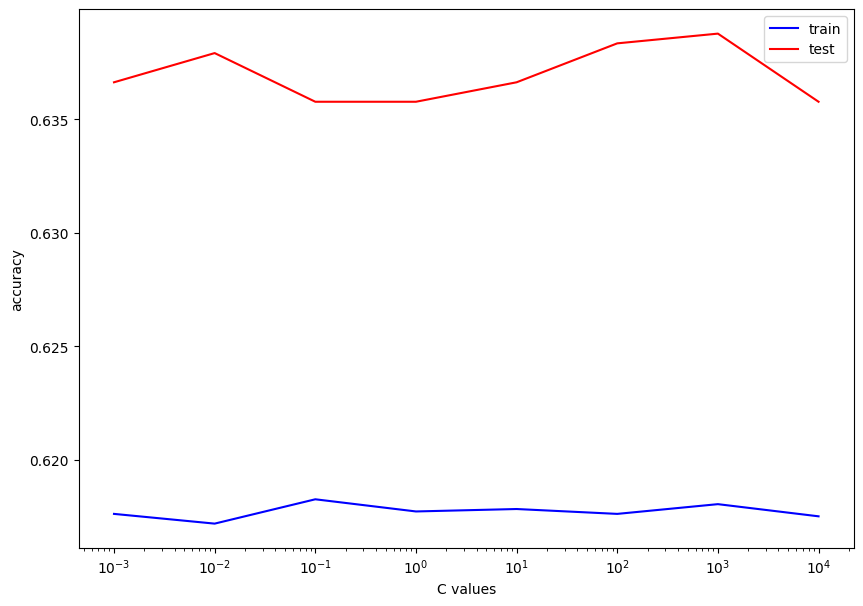

In [80]:
#Log Reg with C value tuning

C_range = 10.**np.arange(-3,5)

train_acc = []
test_acc = []

#testing log reg models with different C values
for c in C_range:
    
    Logreg = LogisticRegression(C=c, max_iter=1000)
    Logreg.fit(X_train, y_train)
    
    # Score
    
    train_score = Logreg.score(X_train, y_train)
    test_score = Logreg.score(X_test, y_test)
    
    train_acc.append(train_score)
    test_acc.append(test_score)

    
import matplotlib.pyplot as plt

#plotting train and test scores

plt.figure(figsize=(10,7))

plt.plot(C_range, train_acc, color='blue', label='train')
plt.plot(C_range, test_acc, color='red', label='test')

plt.xlabel('C values')
plt.ylabel('accuracy')

plt.xscale('log')

plt.legend()
plt.show()


In [59]:
#Determining the C value with the highest test accuracy
index_highest_acc = np.argmax(test_acc)

print(f'best C value is {C_range[index_highest_acc]}')

best C value is 1000.0


In [61]:
#Running a model based on the optimal C value

Logreg = LogisticRegression(C=1000, max_iter=1000)
Logreg.fit(X_train, y_train)
    
# Score
train_score = Logreg.score(X_train, y_train)
test_score = Logreg.score(X_test, y_test)

print(train_score)
print(test_score)

0.6180414029818728
0.6387816387816387


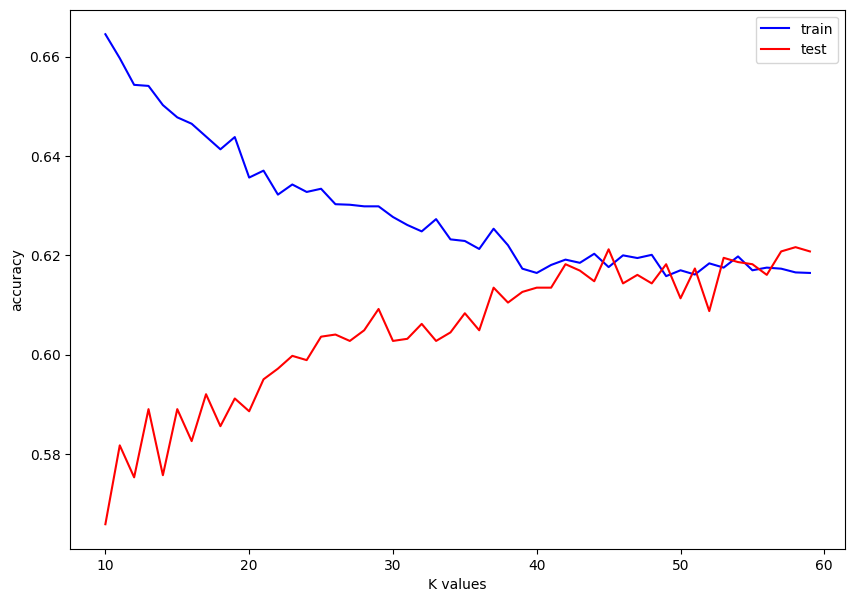

In [71]:
# Let's try KNN
from sklearn.neighbors import KNeighborsClassifier

#starting at range 10 because everything lower has far too low an accuracy (saving compute time)
neighbors = range(10,60,1)

#Creating empty lists to append results too
train_acc = []
test_acc = []

for n in neighbors:
    
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train, y_train)
    
    # Score
    
    train_score = KNN_model.score(X_train, y_train)
    test_score = KNN_model.score(X_test, y_test)
    
    train_acc.append(train_score)
    test_acc.append(test_score)

    
#Plotting results
plt.figure(figsize=(10,7))

plt.plot(neighbors, train_acc, color='blue', label='train')
plt.plot(neighbors, test_acc, color='red', label='test')

plt.xlabel('K values')
plt.ylabel('accuracy')

plt.legend()
plt.show()

In [73]:
#Determining the K value with the highest test accuracy


index_highest_acc = np.argmax(test_acc)

print(f'best K value is {neighbors[index_highest_acc]}')

best K value is 58


In [74]:
#Running a KNN with the optimal K

KNN_model = KNeighborsClassifier(n_neighbors=58)
KNN_model.fit(X_train, y_train)
    
# Score
train_score = KNN_model.score(X_train, y_train)
test_score = KNN_model.score(X_test, y_test)

print(train_score)
print(test_score)

0.6165397404269012
0.6216216216216216


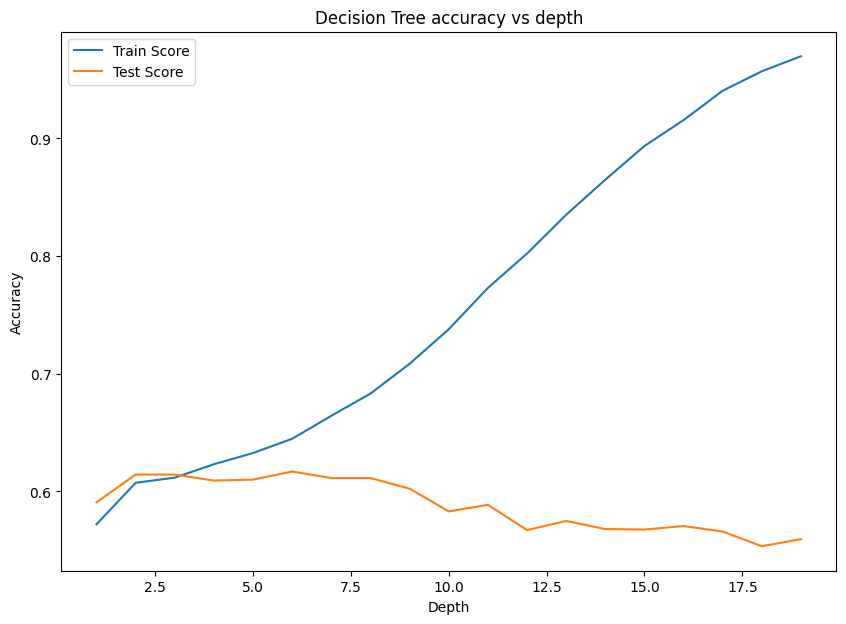

In [75]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier


depth_range = range(1,20)

scores = pd.DataFrame()

for max_depth in depth_range:
    
    # Instantiate the model
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    
    # fitting
    dt_model.fit(X_train, y_train)
    
    # Scoring
    
    train_score = dt_model.score(X_train, y_train)
    test_score = dt_model.score(X_test, y_test)
    
    scores = scores.append({"Depth": max_depth, "Train Score": train_score, "Test Score":test_score}, ignore_index=True)
    
    
#Plotting the model

plt.figure(figsize=(10,7))

plt.plot('Depth', 'Train Score', data=scores)
plt.plot('Depth', 'Test Score', data=scores)

plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree accuracy vs depth')

plt.legend()
plt.show()

In [76]:
#Determining the best score and depth
best_score = scores['Test Score'].max()
print(best_score)
best_depth = scores[scores['Test Score'] == best_score]
print(f'Best depth is {best_depth}')

0.6169026169026169
Best depth is    Depth  Test Score  Train Score
5    6.0    0.616903      0.64475


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

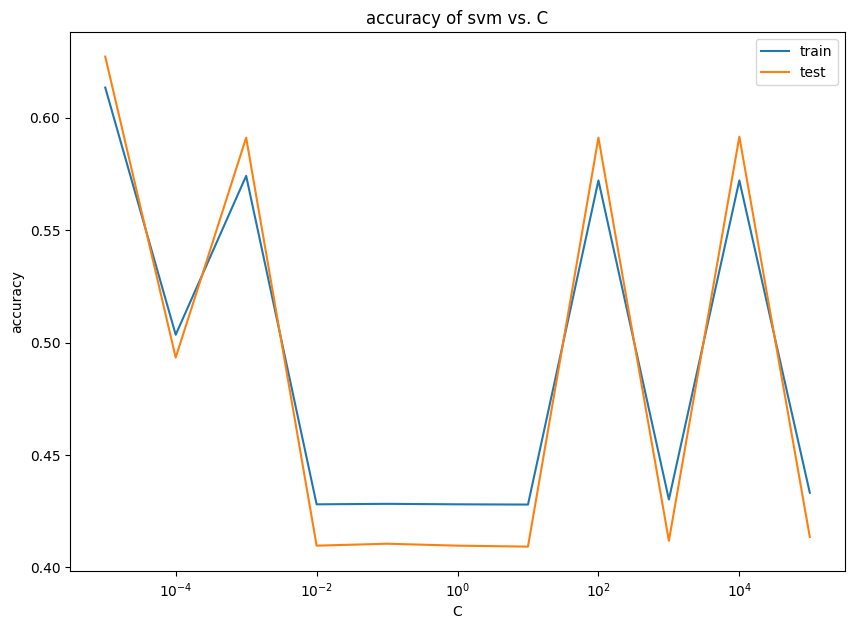

In [77]:
#SVM

from sklearn.svm import LinearSVC

svm_train_acc = []
svm_test_acc = []

C_range = 10.**np.arange(-5,6)

for c in C_range:
    
    svm_model = LinearSVC(C=c)
    
    svm_model.fit(X_train,y_train)
    
    # Score
    train_acc = svm_model.score(X_train,y_train)
    test_acc = svm_model.score(X_test, y_test)
    
    svm_train_acc.append(train_acc)
    svm_test_acc.append(test_acc)

#Plotting the results

plt.figure(figsize=(10,7))

plt.plot(C_range, svm_train_acc, label = 'train')
plt.plot(C_range, svm_test_acc, label = 'test')

plt.title('accuracy of svm vs. C')
plt.xlabel('C')
plt.ylabel('accuracy')


plt.xscale('log')

plt.legend()
plt.show()

In [78]:
#Finding the optimal C value
index_of_max_test = np.argmax(svm_test_acc)
best_c_svm = C_range[index_of_max_test]

print(f'Best c value for svm is {best_c_svm}')

Best c value for svm is 1e-05


In [79]:
#Running a model with the optimized C value

svm_model = LinearSVC(C=0.00001)
svm_model.fit(X_train,y_train)
# Score
train_acc = svm_model.score(X_train,y_train)
test_acc = svm_model.score(X_test, y_test)

print(train_acc)
print(test_acc)

0.614072723372305
0.6280566280566281


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


After running a few different models, it appears that the most successful one was Log Reg. The next two were SVM and Decision Tree. Going forward we will focus on these models. In further notebooks, I will explore features in further detail, look into new features and applying ensemble learning techniques.